# Project

In [1]:
import numpy as np
import random
import math
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as spio
from IPython.display import display
import scipy.sparse.linalg as ll
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import sklearn.utils.graph_shortest_path as skug
from scipy.linalg import svd
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Read in the data
DATA_PATH = "data/"
spotify_artists_top_tracks_df = pd.read_csv('{}spotify_artists_top_tracks.csv'.format(DATA_PATH))
print("{} x {} table of data:".format(spotify_artists_top_tracks_df.shape[0], spotify_artists_top_tracks_df.shape[1]))
display(spotify_artists_top_tracks_df.head ())
print("Remove any N/As...\n\n")
spotify_artists_top_tracks_df = spotify_artists_top_tracks_df.dropna()
print("{} x {} table of data:".format(spotify_artists_top_tracks_df.shape[0], spotify_artists_top_tracks_df.shape[1]))
display(spotify_artists_top_tracks_df.head ())

17306 x 21 table of data:


,artist_uri,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Abbey Road (Remastered),9/26/1969,17,185733,False,Here Comes The Sun - Remastered 2009,83,spotify:track:6dGnYIeXmHdcikdzNNDMm2,0.557,...,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.171,4
1,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Let It Be (Remastered),5/8/1970,12,243026,False,Let It Be - Remastered 2009,78,spotify:track:7iN1s7xHE4ifF5povM6A48,0.443,...,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,0.410,143.462,4
2,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Abbey Road (Remastered),9/26/1969,17,259946,False,Come Together - Remastered 2009,78,spotify:track:2EqlS6tkEnglzr7tkKAAYD,0.533,...,9,-11.913,0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,4
3,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Help! (Remastered),8/6/1965,14,125666,False,Yesterday - Remastered 2009,76,spotify:track:3BQHpFgAp4l80e1XslIjNI,0.332,...,5,-11.830,1,0.0326,0.8790,0.000000,0.0886,0.315,96.529,4
4,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Please Please Me (Remastered),3/22/1963,14,155226,False,Twist And Shout - Remastered 2009,75,spotify:track:5ZBeML7Lf3FMEVviTyvi8l,0.482,...,2,-9.198,1,0.0452,0.6410,0.000008,0.0414,0.937,124.631,4


Remove any N/As...


17306 x 21 table of data:


,artist_uri,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Abbey Road (Remastered),9/26/1969,17,185733,False,Here Comes The Sun - Remastered 2009,83,spotify:track:6dGnYIeXmHdcikdzNNDMm2,0.557,...,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.171,4
1,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Let It Be (Remastered),5/8/1970,12,243026,False,Let It Be - Remastered 2009,78,spotify:track:7iN1s7xHE4ifF5povM6A48,0.443,...,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,0.410,143.462,4
2,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Abbey Road (Remastered),9/26/1969,17,259946,False,Come Together - Remastered 2009,78,spotify:track:2EqlS6tkEnglzr7tkKAAYD,0.533,...,9,-11.913,0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,4
3,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Help! (Remastered),8/6/1965,14,125666,False,Yesterday - Remastered 2009,76,spotify:track:3BQHpFgAp4l80e1XslIjNI,0.332,...,5,-11.830,1,0.0326,0.8790,0.000000,0.0886,0.315,96.529,4
4,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Please Please Me (Remastered),3/22/1963,14,155226,False,Twist And Shout - Remastered 2009,75,spotify:track:5ZBeML7Lf3FMEVviTyvi8l,0.482,...,2,-9.198,1,0.0452,0.6410,0.000008,0.0414,0.937,124.631,4


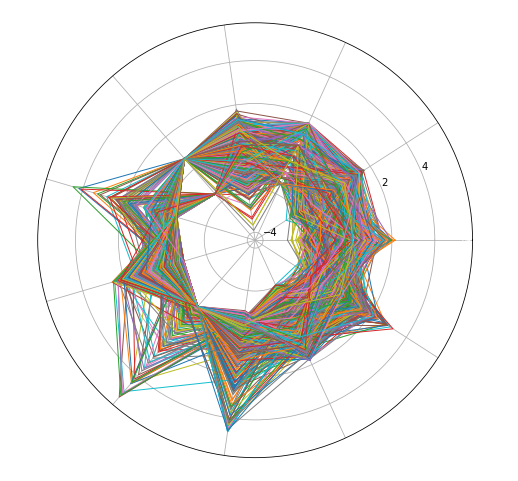

In [4]:
randi = [random.randint(0, 1000) for i in range(0, 1000)]
# print(randi) 

columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
scaler = StandardScaler()
data = scaler.fit_transform(df1).tolist()

temp = data[:1000]
# temp = [data[i] for i in randi]
# print(temp[0])
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

In [5]:
# Build the data matrix and condition it

columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

D_raw = df1
D_raw = D_raw.T

m, d = D_raw.shape
print("D_raw:", D_raw.shape)


D_raw: (11, 17306)


17306


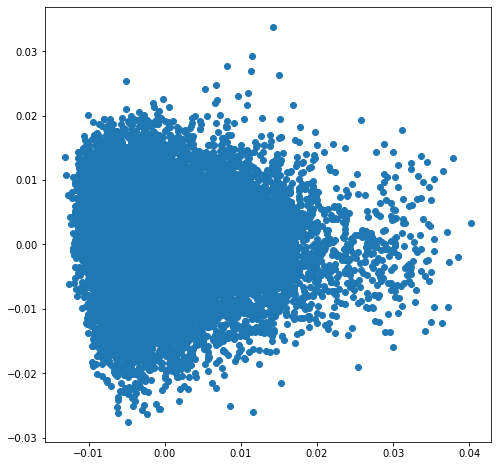

In [6]:
pca = PCA(n_components = 2)
prin_comps = pca.fit(D_raw);

print(len(prin_comps.components_[0]))
# prin_comp_1 = prin_comps[:, 0]
# prin_comp_2  = prin_comps[:, 1]

figure, axes = plt.subplots(figsize = (8,8))
axes.scatter(prin_comps.components_[0], prin_comps.components_[1])


In [7]:
# Build the data matrix and condition it

columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
D_raw = df1

m, d = D_raw.shape
print("D_raw:", D_raw.shape)

D_raw: (17306, 11)


11


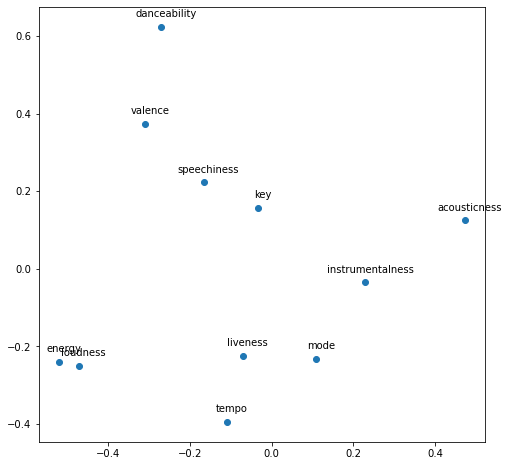

In [8]:
pca = PCA(n_components = 2)
prin_comps = pca.fit(D_raw);

print(len(prin_comps.components_[0]))
figure, axes = plt.subplots(figsize = (8,8))
axes.scatter(prin_comps.components_[0], prin_comps.components_[1])

for i in range(0, len(columns)):

    plt.annotate(columns[i], # this is the text
                 (prin_comps.components_[0][i], prin_comps.components_[1][i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

(11,)


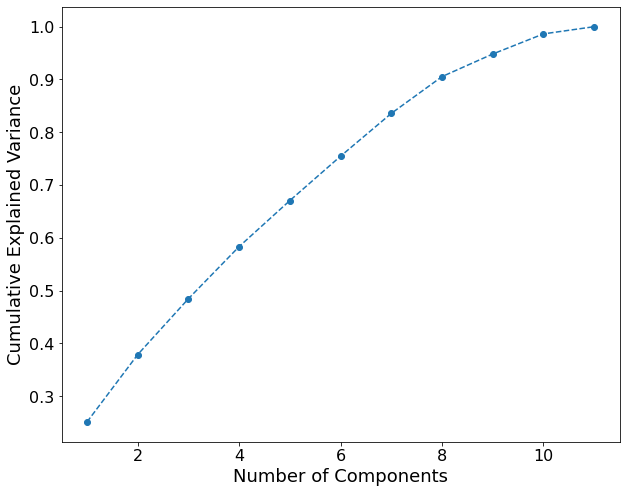

In [9]:
pca = PCA()
pca.fit(D_raw);

evr = pca.explained_variance_ratio_
print(evr.shape)
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, D_raw.shape[1]+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# fig = plt.savefig("./visualizations/cumulative_variance_plot.png")
plt.show()

In [10]:
pca = PCA(n_components = 7)
prin_comps = pca.fit(D_raw);
D_pca = pca.transform(D_raw)

print("D_pca: ", D_pca.shape)

D_pca:  (17306, 7)
